Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing & inspecting data

In [2]:
df = pd.read_excel('startup-expansion.xlsx')
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [4]:
df.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [5]:
df[['Marketing Spend', 'Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


processing data

In [6]:
df['City'].value_counts()

City
Rochester          2
Midland            1
Spokane            1
Denton             1
Peoria             1
                  ..
Paterson           1
Brownsville        1
Rockford           1
College Station    1
Thousand Oaks      1
Name: count, Length: 149, dtype: int64

In [7]:
df['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [8]:
df['State'].value_counts()

State
California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
New Jersey         4
Connecticut        4
Georgia            4
Alabama            4
Arizona            3
South Carolina     3
Michigan           3
Utah               3
Iowa               3
Tennessee          3
Massachusetts      3
New York           3
Kansas             3
Oregon             2
North Carolina     2
Louisiana          2
Virginia           2
Ohio               2
Oklahoma           1
New Mexico         1
Mississippi        1
Arkansas           1
New Hampshire      1
Indiana            1
Montana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: count, dtype: int64

In [9]:
df['Sales Region'].value_counts()

Sales Region
Region 2    86
Region 1    64
Name: count, dtype: int64

In [10]:
df['New Expansion'].value_counts()

New Expansion
Old    140
New     10
Name: count, dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

Analysing data

In [12]:
df.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
31,32,Grand Rapids,Michigan,Region 1,Old,2808,65475
30,31,Boulder,Colorado,Region 2,Old,3083,22680
37,38,Oxnard,California,Region 2,Old,2318,64302
38,39,Miramar,Florida,Region 1,Old,3488,49506
123,124,Daly City,California,Region 2,Old,2658,20703
25,26,Port St. Lucie,Florida,Region 1,Old,2420,55790
29,30,Edison,New Jersey,Region 1,Old,3131,22972
23,24,Burbank,California,Region 2,Old,3679,20123
53,54,Everett,Washington,Region 2,Old,3129,15562
97,98,Naperville,Illinois,Region 1,Old,2699,39856


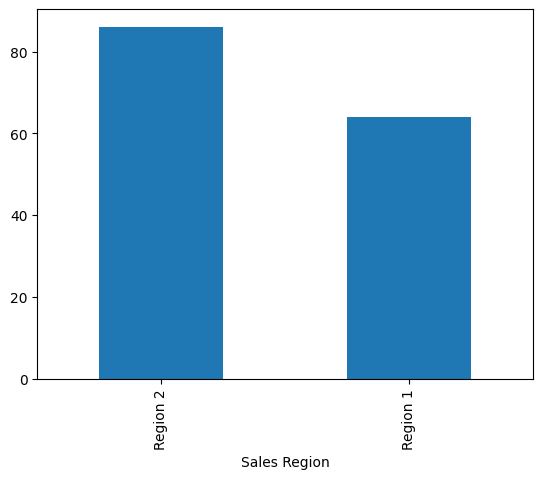

In [13]:
df['Sales Region'].value_counts().plot(kind= 'bar')
plt.show()

In [14]:
df[df['New Expansion'] == 'Old'].groupby(['State','City']).max()['Revenue'].nlargest(10)

State          City          
Arkansas       Little Rock       68828
Michigan       Grand Rapids      65475
New York       Rochester         64906
California     Oxnard            64302
               Fontana           63027
Rhode Island   Providence        62337
Alabama        Birmingham        60338
Kansas         Overland Park     59887
California     San Bernardino    59870
Massachusetts  Worcester         59840
Name: Revenue, dtype: int64

In [15]:
df[df['New Expansion'] == 'New'].groupby(['State','City']).max()['Revenue'].nlargest(10)

State       City            
Texas       Brownsville         63148
Tennessee   Chattanooga         55357
California  Rancho Cucamonga    52366
            Glendale            49376
Arizona     Tempe               48954
Illinois    Joliet              48315
            Rockford            43377
California  Thousand Oaks       40141
New Jersey  Paterson            34603
Texas       College Station     22457
Name: Revenue, dtype: int64

In [16]:
df['Profit'] = df['Revenue'] - df['Marketing Spend']

In [17]:
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [18]:
df['ROMS'] = round((df['Profit'] / df['Marketing Spend']) * 100,2)

In [19]:
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38
...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07


In [20]:
df['ROMS %'] = df['ROMS'] /100
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS %
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5007


In [21]:
df.query("`New Expansion` == 'New'").sort_values('ROMS %', ascending=False).head(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS %
144,145,Glendale,California,Region 2,New,2363,49376,47013,1989.55,19.8955
143,144,Rancho Cucamonga,California,Region 2,New,2945,52366,49421,1678.13,16.7813
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
141,142,Tempe,Arizona,Region 2,New,2911,48954,46043,1581.69,15.8169
149,150,Thousand Oaks,California,Region 2,New,2431,40141,37710,1551.21,15.5121
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
140,141,Chattanooga,Tennessee,Region 2,New,3587,55357,51770,1443.27,14.4327
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
142,143,Joliet,Illinois,Region 1,New,3279,48315,45036,1373.47,13.7347
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5007


In [22]:
df.query("`New Expansion` == 'Old'").sort_values('ROMS %', ascending=False).head(10)['ROMS %']

63     27.2082
37     26.7403
31     22.3173
25     22.0537
8      21.3701
9      20.7513
102    20.6882
50     20.5415
118    20.4266
41     19.8938
Name: ROMS %, dtype: float64

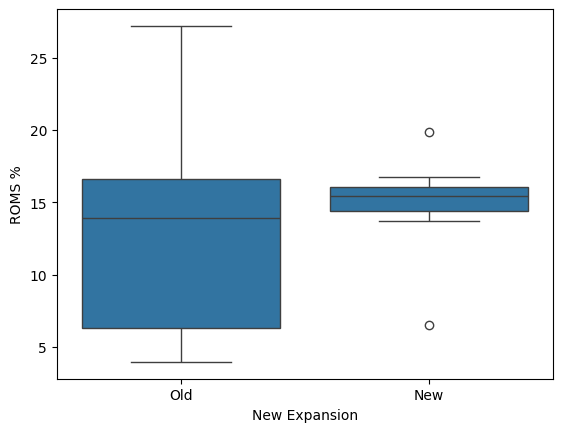

In [23]:
sns.boxplot(x="New Expansion", y="ROMS %", data=df)
plt.show()

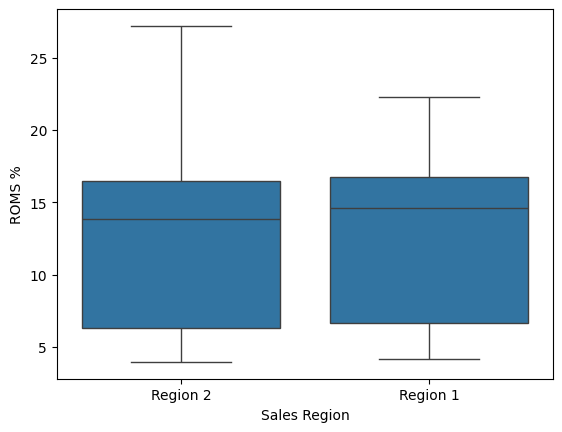

In [24]:
sns.boxplot(x="Sales Region", y="ROMS %", data=df)
plt.show()


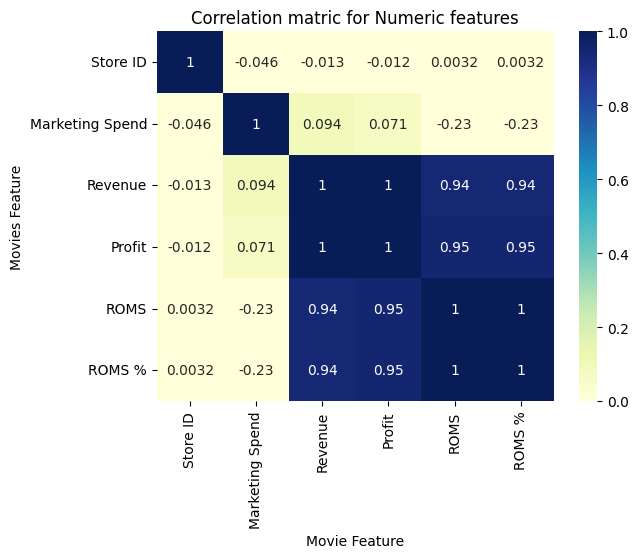

In [27]:
#plt.figure(figsize= (15,10))
correlation_matrix =df.corr( numeric_only=True,method='pearson') 

sns.heatmap(correlation_matrix, annot=True , cmap= 'YlGnBu' , vmin= 0, vmax=1 )
plt.title('Correlation matric for Numeric features')
plt.xlabel('Movie Feature')
plt.ylabel('Movies Feature')
plt.show()

In [28]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(3)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS %
0,1,94,1,1,1,2601,48610,46009,1768.90,17.6890
1,2,71,30,1,1,2727,45689,42962,1575.43,15.7543
2,3,121,33,1,1,2768,49554,46786,1690.25,16.9025


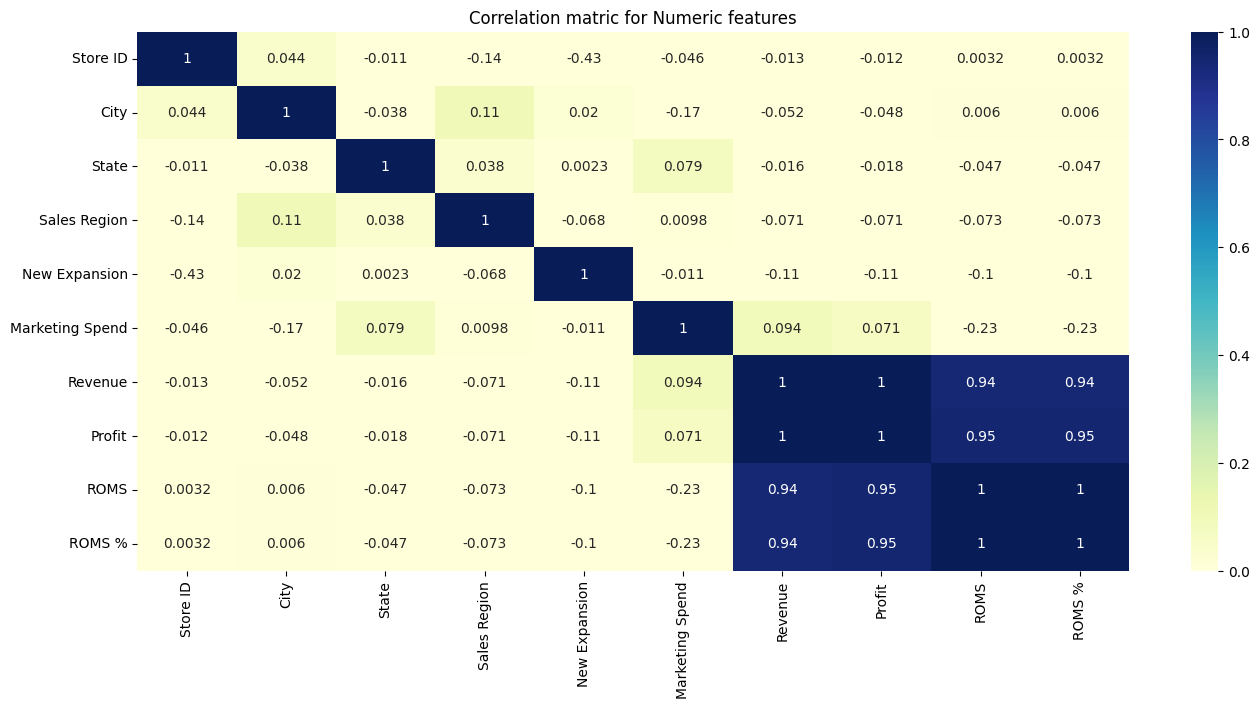

In [29]:
plt.figure(figsize=(16, 7))

correlation_matrix = df_numerized.corr( numeric_only=True,method='pearson') 

sns.heatmap(correlation_matrix, annot=True, cmap= 'YlGnBu' ,vmax=1 , vmin= 0)
plt.title('Correlation matric for Numeric features')
plt.show()

In [26]:
df.to_excel('startup.xlsx')